In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

## K-Means

http://scikit-learn.org/stable/modules/clustering.html#k-means
  
Kmeans clusters data by trying to separate samples into n groups of equal variance by minimizing inertia (within-cluster sum-of-squares). Kmeans scales well to large numbers of samples.



Data Source: [heart disease data](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UC Irvine Machine Learning Repository.  
Our goal will be to create a $k$-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

To make it easier to visualize our potential clusters, we will reduce the data to 2 components using PCA.

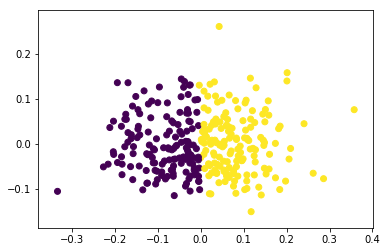

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [3]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Looks like this model isn't doing very well. We're correctly classifying 182 cases, but mis-classifying 120 of the cases!

Now let's try MiniBatch:

In [4]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0      149   20
1        0  134


In [5]:
kmeans = KMeans(n_clusters=2, random_state=27, precompute_distances=False)

y_pred = kmeans.fit_transform(X_pca)
y_pred

array([[0.06430764, 0.12793225],
       [0.24357772, 0.12812993],
       [0.11777212, 0.06107775],
       [0.08893354, 0.16379981],
       [0.06092053, 0.21568648],
       [0.07595637, 0.16099891],
       [0.09986999, 0.0680946 ],
       [0.25390352, 0.10610481],
       [0.11177353, 0.05634797],
       [0.03630062, 0.19266845],
       [0.06305547, 0.20956847],
       [0.15851465, 0.01177836],
       [0.12771821, 0.04053609],
       [0.12156203, 0.11421248],
       [0.11975325, 0.26138337],
       [0.16385112, 0.32930716],
       [0.09635739, 0.15291635],
       [0.04607988, 0.12189057],
       [0.16920761, 0.00663901],
       [0.10222781, 0.09667926],
       [0.05683441, 0.11683165],
       [0.1123791 , 0.05600222],
       [0.15925944, 0.05808174],
       [0.02859272, 0.17453211],
       [0.07123295, 0.13354672],
       [0.04952023, 0.14319847],
       [0.22457824, 0.09316827],
       [0.1682356 , 0.14475149],
       [0.03259305, 0.13641385],
       [0.04541731, 0.15203041],
       [0.

##### fit_transform returns a numpy array with 2 columns.  
Column 1 = Euclidean distance to the first cluster  
Column 2 = Euclidean distance to the second cluster  
&nbsp;

The values show how far each point is from each cluster - the futher away the less the point aligns with the rest of the cluster.

In [6]:
labels = kmeans.labels_
pd.crosstab(labels, y)

col_0,0,1
row_0,,
0,55,99
1,84,65


It looks like this isn't performing too well.  The first cluster contains 55 patients without heart disease (y = 0) and 99 with (y = 1), and the second contains 84 with no heart disease and 65 with.  
&nbsp;

Correctly classified patients are 55 negative for heart disease and 65 positive for heart disease.

In [11]:
## adding more clusters
kmeans = KMeans(n_clusters=15, random_state=27)

y_pred = kmeans.fit_transform(X_pca)

labels = kmeans.labels_
pd.crosstab(labels, y)

col_0,0,1
row_0,,
0,5,15
1,19,17
2,18,20
3,17,1
4,8,17
5,13,8
6,0,6
7,2,13
8,2,0
